In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df= pd.read_csv('supermarket_sales - Sheet1.csv')
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
# Let's describe the full sheet
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [5]:
# Find the no. of rows & column are present this dataset
print('Number of rows', df.shape[0])
print('Number of columns', df.shape[1])

Number of rows 1000
Number of columns 17


In [6]:
# To finding is there any null value are present
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [7]:
# Get Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [8]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [9]:
df.columns= [x.replace(' ', "_")for x in df.columns]

In [10]:
df.columns

Index(['Invoice_ID', 'Branch', 'City', 'Customer_type', 'Gender',
       'Product_line', 'Unit_price', 'Quantity', 'Tax_5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross_margin_percentage', 'gross_income',
       'Rating'],
      dtype='object')

In [11]:
# Drop columns
df=df.drop(columns=['Branch','Tax_5%','Time'],axis=1)
df.head()

,Invoice_ID,City,Customer_type,Gender,Product_line,Unit_price,Quantity,Total,Date,Payment,cogs,gross_margin_percentage,gross_income,Rating
0,750-67-8428,Yangon,Member,Female,Health and beauty,74.69,7,548.9715,1/5/2019,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,80.2200,3/8/2019,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Yangon,Normal,Male,Home and lifestyle,46.33,7,340.5255,3/3/2019,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Yangon,Member,Male,Health and beauty,58.22,8,489.0480,1/27/2019,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Yangon,Normal,Male,Sports and travel,86.31,7,634.3785,2/8/2019,Ewallet,604.17,4.761905,30.2085,5.3


In [12]:
df.rename(columns = {'Product_line':'Product'}, inplace = True)

In [13]:
#Product wise sum of unit price
df.groupby('Product')['Unit_price'].sum()

Product
Electronic accessories     9103.77
Fashion accessories       10173.35
Food and beverages         9745.54
Health and beauty          8337.88
Home and lifestyle         8850.71
Sports and travel          9460.88
Name: Unit_price, dtype: float64

<AxesSubplot:xlabel='Product'>

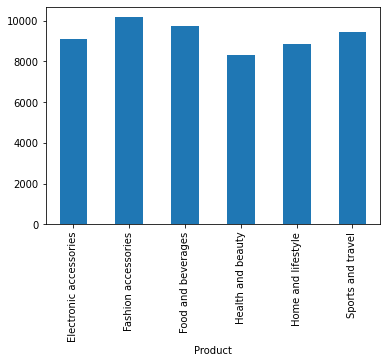

In [14]:
df.groupby('Product')['Unit_price'].sum().plot(kind='bar')

# Now I am adding week column for finding sales by day of the week

In [15]:
df= pd.read_csv('supermarket_sales - Sheet1.csv',parse_dates=['Date'])

In [16]:
df['Date'].dt.dayofweek

0      5
1      4
2      6
3      6
4      4
      ..
995    1
996    5
997    5
998    4
999    0
Name: Date, Length: 1000, dtype: int64

In [17]:
week={
    0:'Mon',
    1:'Tue',
    2:'Wed',
    3:'Thur',
    4:'Fri',
    5:'Sat',
    6:'Sun'
    
}

In [18]:
df['Date'].dt.dayofweek.map(week)

0      Sat
1      Fri
2      Sun
3      Sun
4      Fri
      ... 
995    Tue
996    Sat
997    Sat
998    Fri
999    Mon
Name: Date, Length: 1000, dtype: object

In [19]:
df['Day_of_week']=df['Date'].dt.dayofweek.map(week)

In [20]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Day_of_week
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,Sat
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,Fri
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,Sun
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,Sun
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,Fri


<AxesSubplot:>

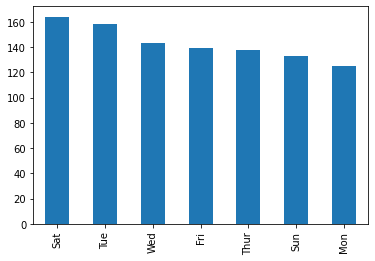

In [21]:
df['Day_of_week'].value_counts().plot(kind='bar')

# Now I want to see sales by month by adding month column

In [22]:
month= {
    1:"Jan",
    2:"Feb",
    3:"March"
    
}

In [23]:
df['Month']=df['Date'].dt.month.map(month)

In [24]:
df.head(3)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Day_of_week,Month
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,Sat,Jan
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,Fri,March
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,Sun,March


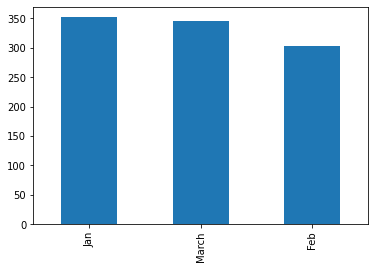

In [25]:
df['Month']=df['Date'].dt.month.map(month).value_counts().plot(kind='bar')